Aqui está a versão em Notebook do projeto em que estou fazendo a análise exploratória e o tratamento dos dados "Tesla Deaths: Um conjunto de dados de incidentes fatais envolvendo veículos da Tesla".
Disponível em :"https://www.kaggle.com/datasets/ibriiee/tesla-autonomous-deaths-data-updated-2023".

In [56]:
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt

Importar dados e visualizar informações importantes

In [57]:
dataset = pd.read_csv("Tesla Deaths - Deaths.csv")
# visulizar
dataset.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


Primeiro problema é dar nomes as colunas

In [58]:
dataset.columns = ["Caso", "Ano",
                   "Data", "Pais", "Estado",
                   "Descrição", "Mortes", "Motorista",
                   "Ocupante", "Outro", "Pedestre",
                   "TSLA", "Modelo", "Alegado Piloto Automático",
                   "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

Deletar linhas e colunas insignificantes

In [59]:
dataset.drop(['1', '2', '3', '4', '5', '6', '7',
             '8', '9', '10', 'TSLA', 'Ano', 'Caso'], axis=1, inplace=True)
dataset.drop([294, 295, 296, 297, 298, 299, 300, 301,
             302, 303, 304, 305, 306], inplace=True)

Exploração de dados categóricos

País: Há necessidade de arupá-los em mesmos países para melhor visualização

In [60]:
pais = dataset['Pais'].value_counts()
pais

 USA             215
 China            16
 Germany          11
 Canada           10
 Netherlands       6
 UK                5
 Norway            4
 Holland           3
 Taiwan            3
 Switzerland       3
 Belgium           2
 Denmark           2
 France            2
 Australia         2
 Japan             2
 Portugal          1
 South Korea       1
 Finland           1
 Slovenia          1
 Austria           1
 Ukraine           1
 Spain             1
 Mexico            1
Name: Pais, dtype: int64

Estado: Ajustar os nomes e alterar dados "-"

In [61]:
est = dataset['Estado'].value_counts()
est

-       79
 CA     75
 FL     24
CA      16
FL       8
 AZ      8
 GA      6
 OH      6
 NY      5
 PA      5
 NV      4
 UT      4
 TX      4
 VA      4
 MO      3
 NJ      3
GA       3
 IL      2
 IA      2
 CO      2
 WA      2
 NH      2
 IN      2
 OR      2
 MI      2
PA       2
SC       2
 HI      2
 NC      1
 ID      1
UT       1
ME       1
MA       1
AL       1
MD       1
HA       1
IL       1
AR       1
MO       1
 DE      1
WA       1
 TN      1
NY       1
Name: Estado, dtype: int64

Modelo do Tesla: Mesmo problema que o Estado

In [62]:
mod = dataset['Modelo'].value_counts()
mod

 -      181
 S       45
  3      39
 X       17
 Y       10
  1       1
  2       1
Name: Modelo, dtype: int64

Exploração das colunas numéricas

Motorista morreu no acidente: É preciso ajuastar valores "-" e NAN's

In [63]:
dataset['Motorista'].describe()

count     289
unique      2
top        - 
freq      172
Name: Motorista, dtype: object

Ocupante (pasageiro) do Tesla foi morto: Mesmos ajustes

In [64]:
dataset['Ocupante'].describe()

count     285
unique      4
top        - 
freq      242
Name: Ocupante, dtype: object

Passageiro ou motorista de outro carro: Mesmos ajustes

In [65]:
dataset['Outro'].describe()

count     290
unique      5
top        - 
freq      180
Name: Outro, dtype: object

Ciclista ou pedestre foram atropelados por um Tesla: Mesmos ajustes

In [66]:
dataset['Pedestre'].describe()

count     291
unique      3
top        - 
freq      247
Name: Pedestre, dtype: object

Quantas pessoas alegaram Piloto Automático no Tesla: Mesmos Ajustes

In [67]:
dataset['Alegado Piloto Automático'].describe()

count     276
unique      3
top        - 
freq      241
Name: Alegado Piloto Automático, dtype: object

Procurar valores nulos (NAN's)

In [68]:
dataset.isnull().sum()


Data                          0
Pais                          0
Estado                        0
Descrição                     0
Mortes                        0
Motorista                     5
Ocupante                      9
Outro                         4
Pedestre                      3
Modelo                        0
Alegado Piloto Automático    18
dtype: int64

Tratamento dos dados categóricos.

País: Agrupando os países com apenas um incidência em "outros" e removendo os espaços indevidos.

In [69]:
dataset['Pais'] = dataset['Pais'].str.strip()
dataset.loc[dataset['Pais'].isin(['Portugal', 'South Korea', 'Finland', 'Slovenia', 'Austria',
                                  'Ukraine', 'Spain', 'Mexico']), 'Pais'] = "Others"
pais = dataset['Pais'].value_counts()
pais


USA            215
China           16
Germany         11
Canada          10
Others           8
Netherlands      6
UK               5
Norway           4
Switzerland      3
Taiwan           3
Holland          3
Australia        2
France           2
Denmark          2
Belgium          2
Japan            2
Name: Pais, dtype: int64

Estado: Removendo os espaços indevidos e subtituindo os "-" por "Desconhecido", visto que são estados de outros países.

In [70]:
dataset['Estado'] = dataset['Estado'].str.strip()
dataset.loc[dataset['Estado'] == '-', 'Estado'] = "Unknown"
est = dataset['Estado'].value_counts()
est

CA         91
Unknown    79
FL         32
GA          9
AZ          8
PA          7
OH          6
NY          6
UT          5
TX          4
VA          4
MO          4
NV          4
IL          3
WA          3
NJ          3
IN          2
IA          2
NH          2
CO          2
MI          2
OR          2
SC          2
HI          2
AL          1
NC          1
ID          1
HA          1
ME          1
MA          1
MD          1
DE          1
AR          1
TN          1
Name: Estado, dtype: int64

Modelo do Tesla: Removendo os espaços indevidos e subtituindo os "-" por "Desconhecido", visto que não foram informados os modelos.

In [71]:
dataset['Modelo'] = dataset['Modelo'].str.strip()
dataset.loc[dataset['Modelo'] == '-', 'Modelo'] = "Unknown"
mod = dataset['Modelo'].value_counts()
mod

Unknown    181
S           45
3           39
X           17
Y           10
1            1
2            1
Name: Modelo, dtype: int64

Tratamento de dados numéricos

Data: Transformando de String em Data.

In [72]:
dataset['Data'] = pd.to_datetime(dataset['Data'])
dataset['Data'] = dataset['Data'].dt.date.astype('datetime64[D]')

Motorista: Espaços removidos, subtituições por 0 e NAN's preenchidas pela moda (0).

In [73]:
dataset['Motorista'] = dataset['Motorista'].str.strip()
dataset.loc[dataset['Motorista'] == '-', 'Motorista'] = "0"
dataset['Motorista'].fillna('0', inplace=True)

Ocupante (pasageiro) do Tesla foi morto: Mesmos ajustes

In [74]:
dataset['Ocupante'] = dataset['Ocupante'].str.strip()
dataset.loc[dataset['Ocupante'] == '-', 'Ocupante'] = "0"
dataset['Ocupante'].fillna('0', inplace=True)

Passageiro ou motorista de outro carro: Mesmos ajustes

In [75]:
dataset['Outro'] = dataset['Outro'].str.strip()
dataset.loc[dataset['Outro'] == '-', 'Outro'] = "0"
dataset['Outro'].fillna('0', inplace=True)

Ciclista ou pedestre foram atropelados por um Tesla: Mesmos ajustes

In [76]:
dataset['Pedestre'] = dataset['Pedestre'].str.strip()
dataset.loc[dataset['Pedestre'] == '-', 'Pedestre'] = "0"
dataset['Pedestre'].fillna('0', inplace=True)

Quantas pessoas alegaram Piloto Automático no Tesla: Mesmos Ajustes

In [77]:
dataset['Alegado Piloto Automático'] = dataset['Alegado Piloto Automático'].str.strip()
dataset.loc[dataset['Alegado Piloto Automático'] == '-', 'Alegado Piloto Automático'] = "0"
dataset['Alegado Piloto Automático'].fillna('0', inplace=True)

Análise dos dados

Análise das mortes por direção automática da Tesla nos últimos 10 anos.

Em primeiro lugar, como pode ser facilmente visto no gráfico anual, o volume de acidentes da Tesla tende a aumentar a cada ano. No entanto, deve ser comparado com as vendas da Tesla a este respeito. 

<BarContainer object of 11 artists>

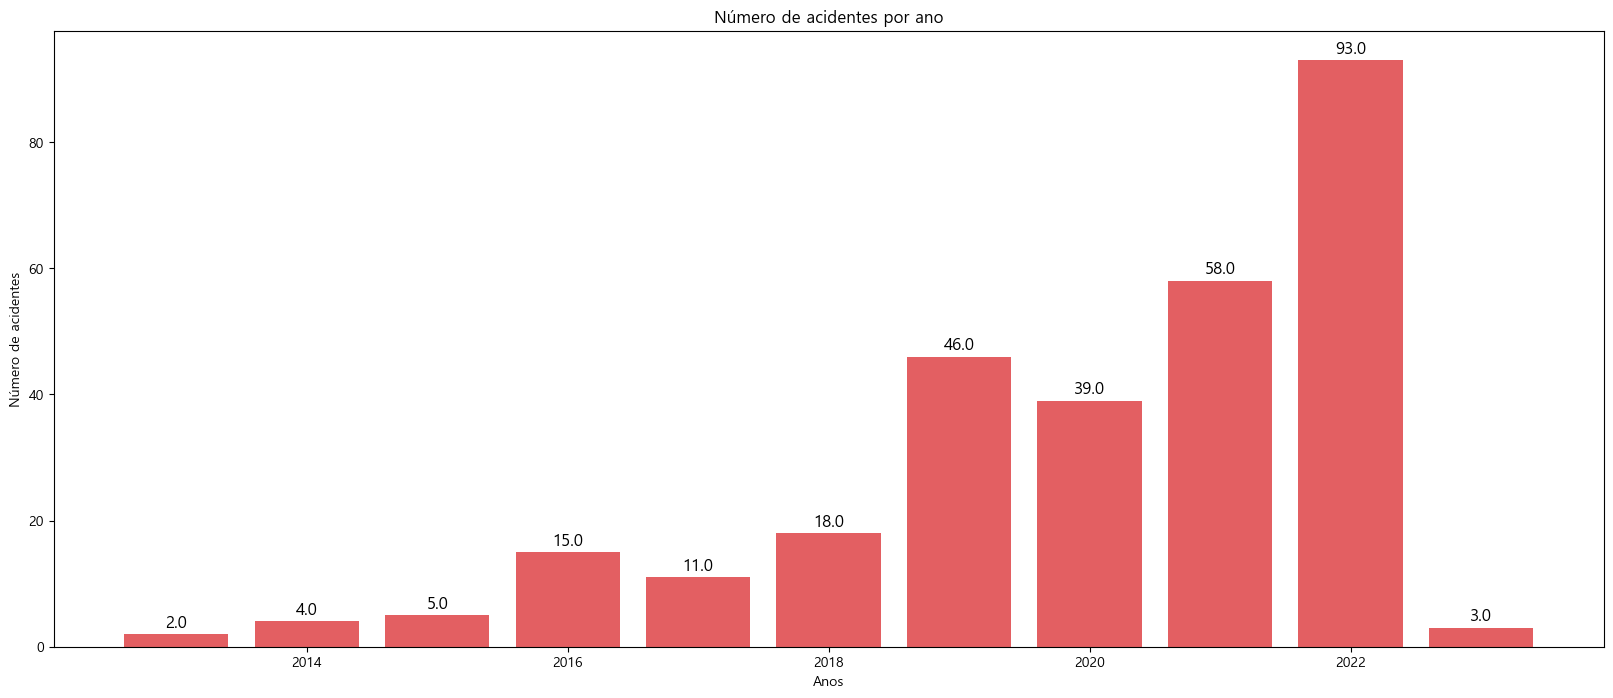

In [78]:
plt.figure(figsize=(20, 8))
x = pd.DatetimeIndex(dataset['Data']).year.value_counts().sort_index().index
y = pd.DatetimeIndex(dataset['Data']).year.value_counts().sort_index().values
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.5, '%.1f' %
             height, ha='center', va='bottom', size=12)
plt.title("Número de acidentes por ano")
plt.xlabel("Anos")
plt.ylabel("Número de acidentes")
plt.bar(x, y, color='#e35f62')

Análise das mortes por direção automática da Tesla por mes em 10 anos.

Ao analisar o valor mensal de acidentes por ano, o número de acidentes em novembro e dezembro é o maior. Uma das coisas mais fáceis de prever por esse motivo são os efeitos do clima. Em novembro e dezembro, neva porque é inverno no norte do globo. Em particular, acho que a influência do clima é grande porque os veículos autônomos podem reduzir a capacidade de controlar os carros delicadamente na neve escorregadia.

<BarContainer object of 12 artists>

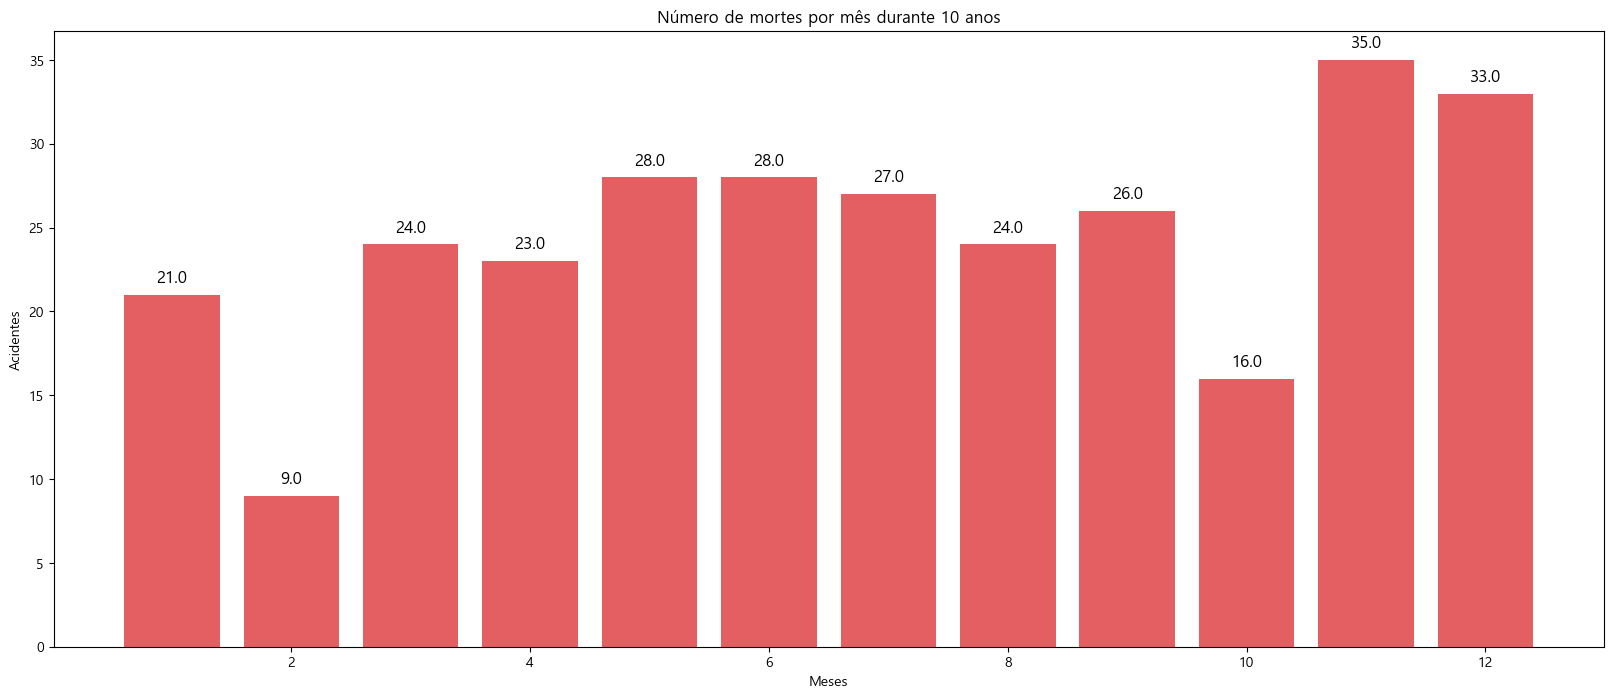

In [79]:
plt.figure(figsize=(20, 8))
x = pd.DatetimeIndex(dataset['Data']).month.value_counts().sort_index().index
y = pd.DatetimeIndex(dataset['Data']).month.value_counts().sort_index().values
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.5, '%.1f' %
             height, ha='center', va='bottom', size=12)
plt.title("Número de mortes por mês durante 10 anos")
plt.xlabel("Meses")
plt.ylabel("Acidentes")
plt.bar(x, y, color='#e35f62')

Análise das mortes por direção automática da Tesla por país.

É nitido que os maiores acidentes foram nos Estados Unidos, possivelmente se deve ao fato de rodarem mais carros por lá, porém é inconclusivo algum outro motivo.

<BarContainer object of 16 artists>

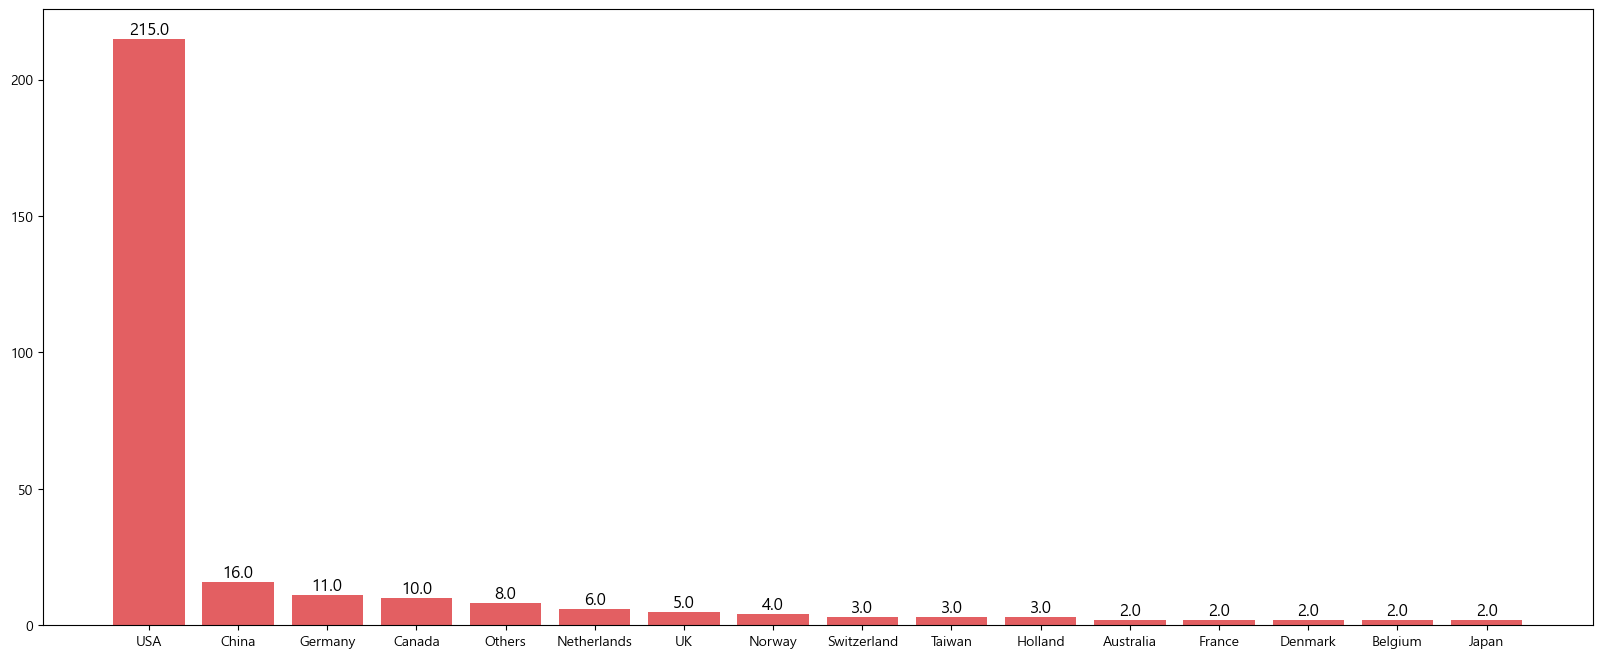

In [80]:
x = dataset["Pais"].value_counts().index
y = dataset["Pais"].value_counts().values
plt.figure(figsize=(20, 8))
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %
             height, ha='center', va='bottom', size=12)
plt.bar(x, y, color='#e35f62')

Análise das mortes por direção automática da Tesla por estado americano.

Novamente, estão classificados como "desconhecido" os estados de outros países que não Estados Unidos.
Vemos que Flórida e a Califórnia dominam o gráfico. Existem muitas hipóteses para isso, como as leis de cada estado, a situação financeira das pessoas e o número de pessoas em cada estado. 

<BarContainer object of 34 artists>

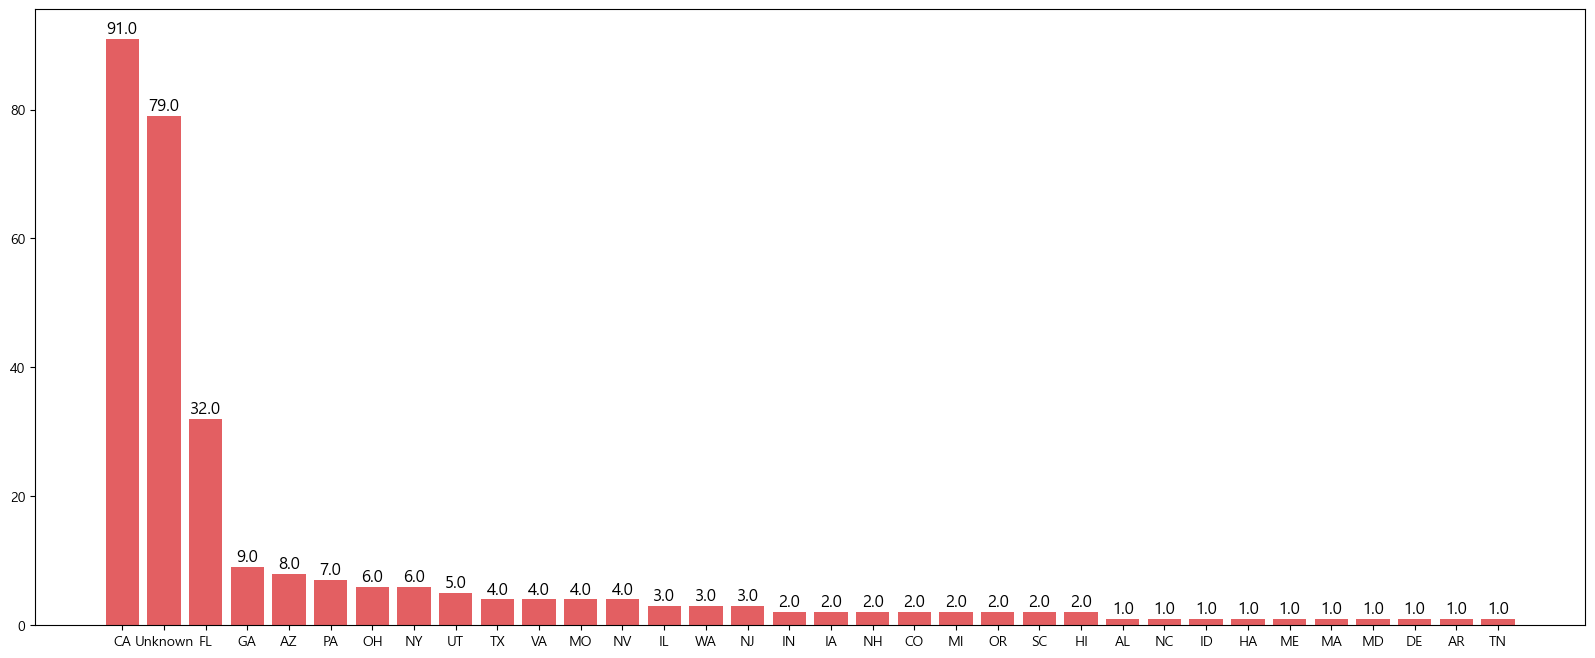

In [81]:
x = dataset["Estado"].value_counts().index
y = dataset["Estado"].value_counts().values
plt.figure(figsize=(20, 8))
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %
             height, ha='center', va='bottom', size=12)
plt.bar(x, y, color='#e35f62')

Análise dos percentuais de mortes.

Nesses 10 anos, o numero total de mortes foi de 353, desses, 110 foram o motorista do Tesla, 48 foram passageiros, 130 foram de outro veículo no acidente, 46 foram pedestres atropelados e 12 não se tem informações sobre. 

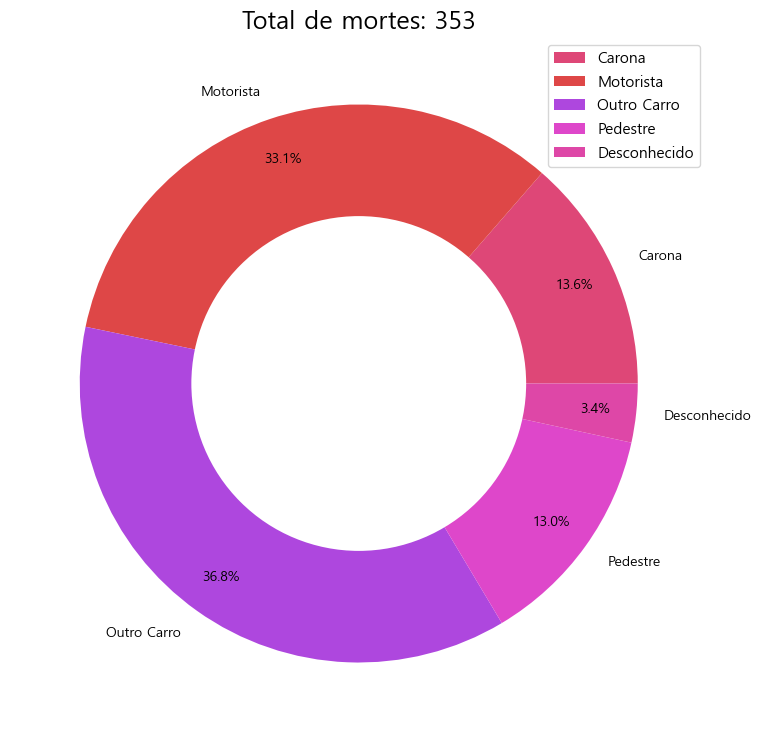

In [82]:
x = dataset["Mortes"].astype('int').sum()
y = dataset["Motorista"].astype('int').sum()
z = dataset["Ocupante"].astype('int').sum()
a = dataset["Outro"].astype('int').sum()
b = dataset["Pedestre"].astype('int').sum()
c = x - (y+z+a+b)
labels = 'Carona', 'Motorista', 'Outro Carro', 'Pedestre', 'Desconhecido'
sizes = [z, y, a, b, c]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
colors = ['#de4777', '#de4747', '#ae47de', '#de47ca', '#de47a7']
plt.figure(figsize=(9, 9))
plt.axis("equal")
plt.rc("font", family="Malgun Gothic")
plt.pie(sizes, labels=labels,  autopct="%.1f%%",
        pctdistance=0.85, colors=colors)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.rc('legend', fontsize=11)
plt.legend()
plt.title("Total de mortes: " + str(x), fontsize=18)
plt.show()

Análise dos modelos de Tesla.

Os resultados podem se dar ao fato de existirem mais modelos rodando do que outros.
Modelo S foi o segundo lançado no mercado e é um dos mais vendidos.
Modelo 3 é o mais barato deles. 

Text(0.5, 1.0, 'Modelos de Tesla mais envolvidos')

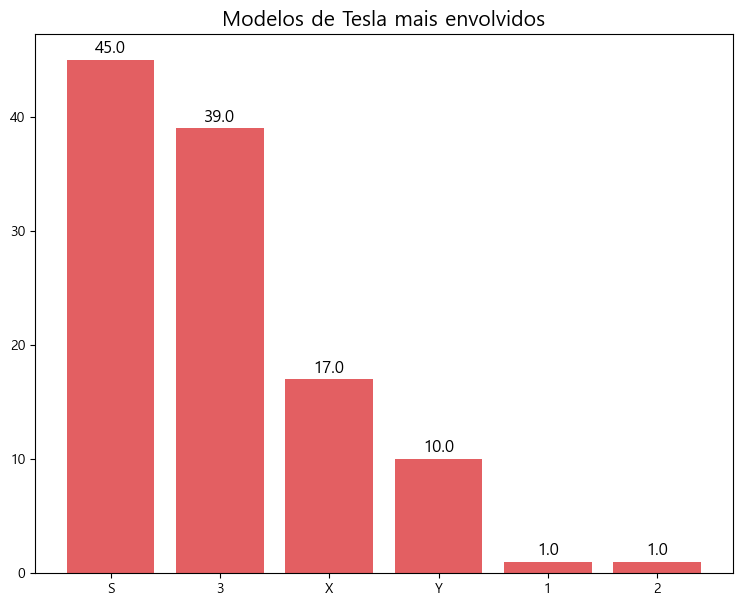

In [83]:
x = dataset["Modelo"].value_counts().index[1:]
y = dataset["Modelo"].value_counts().values[1:]
plt.figure(figsize=(9, 7))
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %
             height, ha='center', va='bottom', size=12)
plt.bar(x, y, color='#e35f62')
plt.title("Modelos de Tesla mais envolvidos", fontsize=15)

Análise do número de pessoas que alegaram o piloto automatico ligado.
Percebe-se que 12% das pessoas alegou que o piloto automático estava ligado

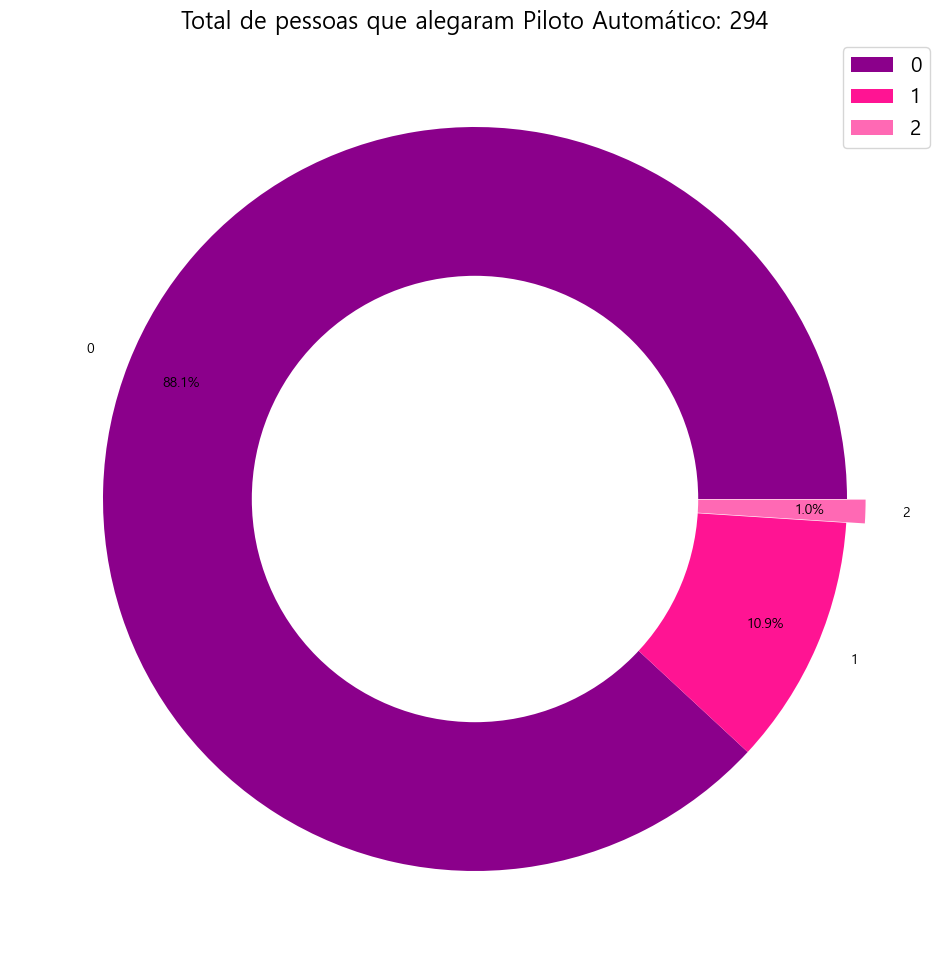

In [84]:
size = dataset["Alegado Piloto Automático"].value_counts().values
color = ["darkmagenta", "deeppink", "hotpink"]
label = dataset["Alegado Piloto Automático"].value_counts().index
plt.figure(figsize=(12, 12))
plt.axis("equal")
plt.rc("font", family="Malgun Gothic")
plt.pie(size, labels=label, autopct="%.1f%%",
        pctdistance=0.85, colors=color, explode=(0, 0, 0.05))
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.rc('legend', fontsize=15)
plt.legend()
plt.title("Total de pessoas que alegaram Piloto Automático: " +
          str(len(dataset["Alegado Piloto Automático"])), fontsize=17)
plt.show()